In [1]:
import os
import re
import pandas as pd
import numpy as np
import sys
import glob
import traceback
import datetime

sys.path.append('/lib')
sys.path.append('/data')
import lib.helper as helper

%matplotlib inline

WORKSHOP_TYPES = ["SWC", "DC", "LC", "TTT", "Circuits"]
STOPPED_WORKSHOP_TYPES = ['stalled', 'cancelled', 'unresponsive']

CURRENT_DIR = os.getcwd()
DATA_DIR = CURRENT_DIR + '/data'
RAW_DATA_DIR = DATA_DIR + '/raw'
PROCESSED_DATA_DIR = DATA_DIR + '/processed'

In [2]:
# Absolute or relative path to workshop data extracted from Carpentries Redash
workshops_file = RAW_DATA_DIR + "/redash_workshops_UK_2020_02_20.csv"

In [3]:
workshops_df = pd.read_csv(workshops_file, encoding = "utf-8")
workshops_df

,slug,venue,address,country_code,longitude,latitude,start,end,attendance,organiser,organiser_domain,organiser_country_code,tags
0,2019-10-29-cardiff,ARCHER-SSI Data Carpentry at Cardiff University,"Training Room 2, Julian Hodge Building, Colum ...",GB,-3.185430,51.491910,2019-10-29,2019-10-30,0,ARCHER,archer.ac.uk,GB,DC
1,2020-02-10-turing,"Software Carpentry Workshop, The Alan Turing I...","British Library, 96 Euston Road, London, NW1 2DB",GB,-0.127100,51.530200,2020-02-10,2020-02-11,0,Alan Turing Institute,turing.ac.uk,GB,SWC
2,2017-11-07-ukarchives,"The National Archives, Kew","J31 Park, B&Q, Motherwell Way, Aveley RM20 3EH...",GB,0.279900,51.481600,2017-11-07,2017-11-07,0,Archives and Records Association (UK & Ireland),archives.org.uk,GB,LC
3,2020-02-20-lancaster,Lancaster University,"Bowland Hall, Bailrigg, Lancaster LA1 4ZA",GB,2.789279,54.012121,2020-02-21,2020-02-22,0,CCP CoDiMa,codima.ac.uk,GB,Circuits
4,2020-xx-xx-cilip,NaN,NaN,GB,NaN,NaN,NaN,NaN,0,"CILIP, library and information association",cilip.org.uk,GB,"LC,cancelled"
5,2015-11-09-cul,NaN,NaN,GB,-0.101594,51.528039,2015-11-09,2015-11-30,59,"City, University of London",city.ac.uk,GB,LC
6,2014-07-21-cranfield,Cranfield University,"Computer Teaching Suite (room 252), Whittle Bu...",GB,-0.629225,52.074389,2014-07-21,2014-07-23,28,Cranfield University,cranfield.ac.uk,GB,SWC
7,2015-11-09-culham,Culham Centre for Fusion Energy,"Abingdon, Oxfordshire, OX14 3DB, UK",GB,-1.228790,51.657608,2015-11-09,2015-11-10,43,Culham Centre for Fusion Energy,ccfe.ac.uk,GB,SWC
8,2018-06-12-bru-datacarpentry-inbo-elixir,U-residence,"Generaal Jacqueslaan 271, 1050 Brussels",BE,4.394176,50.824343,2018-06-12,2018-06-13,17,ELIXIR-UK,elixir-uk.org,GB,DC
9,2018-03-28-paris,Institut Pasteur Paris,"25-28 Rue du Dr Roux, 75015 Paris",FR,2.310683,48.840447,2018-03-28,2018-03-29,12,ELIXIR-UK,elixir-uk.org,GB,SWC


In [4]:
# Convert column "tags" from a string to a list of strings
idx = workshops_df.columns.get_loc("tags")
workshops_df.insert(loc=idx, column='tags_list', value=workshops_df["tags"])
workshops_df["tags_list"] = workshops_df["tags"].str.split(',')

In [5]:
# Check we indeed have created a list of tags
workshops_df.tags_list[4]

['LC', 'cancelled']

In [6]:
# Extract workshop type ('SWC', 'DC', 'LC', 'Circuits', 'TTT') and status ('cancelled', 'unresponsive', 'stalled', "Pilot") 
# and add as a new column
idx = workshops_df.columns.get_loc("tags_list")
workshops_df.insert(loc=idx, column='workshop_type',
                            value=workshops_df["tags_list"])
workshops_df["workshop_type"] = workshops_df["tags_list"].map(helper.extract_workshop_type, na_action="ignore")
workshops_df

,slug,venue,address,country_code,longitude,latitude,start,end,attendance,organiser,organiser_domain,organiser_country_code,workshop_type,tags_list,tags
0,2019-10-29-cardiff,ARCHER-SSI Data Carpentry at Cardiff University,"Training Room 2, Julian Hodge Building, Colum ...",GB,-3.185430,51.491910,2019-10-29,2019-10-30,0,ARCHER,archer.ac.uk,GB,DC,[DC],DC
1,2020-02-10-turing,"Software Carpentry Workshop, The Alan Turing I...","British Library, 96 Euston Road, London, NW1 2DB",GB,-0.127100,51.530200,2020-02-10,2020-02-11,0,Alan Turing Institute,turing.ac.uk,GB,SWC,[SWC],SWC
2,2017-11-07-ukarchives,"The National Archives, Kew","J31 Park, B&Q, Motherwell Way, Aveley RM20 3EH...",GB,0.279900,51.481600,2017-11-07,2017-11-07,0,Archives and Records Association (UK & Ireland),archives.org.uk,GB,LC,[LC],LC
3,2020-02-20-lancaster,Lancaster University,"Bowland Hall, Bailrigg, Lancaster LA1 4ZA",GB,2.789279,54.012121,2020-02-21,2020-02-22,0,CCP CoDiMa,codima.ac.uk,GB,Circuits,[Circuits],Circuits
4,2020-xx-xx-cilip,NaN,NaN,GB,NaN,NaN,NaN,NaN,0,"CILIP, library and information association",cilip.org.uk,GB,LC,"[LC, cancelled]","LC,cancelled"
5,2015-11-09-cul,NaN,NaN,GB,-0.101594,51.528039,2015-11-09,2015-11-30,59,"City, University of London",city.ac.uk,GB,LC,[LC],LC
6,2014-07-21-cranfield,Cranfield University,"Computer Teaching Suite (room 252), Whittle Bu...",GB,-0.629225,52.074389,2014-07-21,2014-07-23,28,Cranfield University,cranfield.ac.uk,GB,SWC,[SWC],SWC
7,2015-11-09-culham,Culham Centre for Fusion Energy,"Abingdon, Oxfordshire, OX14 3DB, UK",GB,-1.228790,51.657608,2015-11-09,2015-11-10,43,Culham Centre for Fusion Energy,ccfe.ac.uk,GB,SWC,[SWC],SWC
8,2018-06-12-bru-datacarpentry-inbo-elixir,U-residence,"Generaal Jacqueslaan 271, 1050 Brussels",BE,4.394176,50.824343,2018-06-12,2018-06-13,17,ELIXIR-UK,elixir-uk.org,GB,DC,[DC],DC
9,2018-03-28-paris,Institut Pasteur Paris,"25-28 Rue du Dr Roux, 75015 Paris",FR,2.310683,48.840447,2018-03-28,2018-03-29,12,ELIXIR-UK,elixir-uk.org,GB,SWC,[SWC],SWC


In [7]:
# How many workshops that do not have a workshop type?
print(workshops_df[workshops_df['workshop_type']==""][["slug", "tags_list"]])
print(workshops_df[workshops_df['workshop_type']==""]['workshop_type'].count())

                       slug       tags_list
36            2018-10-02-DC     [cancelled]
86   2016-04-26-london-nrgi       [stalled]
97        2017-02-13-oxford     [cancelled]
134       2017-04-27-london     [cancelled]
160         2018-01-xx-bath       [stalled]
173  2018-09-xx-bradford-dc     [cancelled]
194       2018-09-05-dundee     [cancelled]
244        2016-09-14-leeds     [cancelled]
263     2017-01-xx-bradford       [stalled]
297       2016-11-14-oxford       [stalled]
302       2018-10-17-oxford     [cancelled]
304       2019-03-19-oxford     [cancelled]
339      2018-06-xx-glasgow  [unresponsive]
341       2017-07-12-sussex          [WiSE]
14


In [8]:
# Extract 'stopped' workshop status, normally ('cancelled', 'unresponsive', 'stalled'), and separate from the workshop's type
idx = workshops_df.columns.get_loc("tags_list")
workshops_df.insert(loc=idx, column='workshop_status',
                            value=workshops_df["tags_list"])
workshops_df["workshop_status"] = workshops_df["tags_list"].map(helper.extract_workshop_status, na_action="ignore")

In [9]:
# How many workshops that do not have a status?
print(workshops_df[workshops_df['workshop_status']==""][["slug", "workshop_type", "tags"]])
print(workshops_df[workshops_df['workshop_status']==""]['workshop_status'].count())

print("Total workshops: " + str(len(workshops_df.index)))

                                         slug workshop_type      tags
0                          2019-10-29-cardiff            DC        DC
1                           2020-02-10-turing           SWC       SWC
2                       2017-11-07-ukarchives            LC        LC
3                        2020-02-20-lancaster      Circuits  Circuits
5                              2015-11-09-cul            LC        LC
6                        2014-07-21-cranfield           SWC       SWC
7                           2015-11-09-culham           SWC       SWC
8    2018-06-12-bru-datacarpentry-inbo-elixir            DC        DC
9                            2018-03-28-paris           SWC       SWC
12                 2018-12-01-elixir-debrecen           SWC       SWC
13                           2018-10-24-ugent           SWC       SWC
14            2019-04-01-ELIXIR-NORWAY_BERGEN           SWC       SWC
15                          2019-02-11-Naples           SWC       SWC
17                  

In [10]:
# How many "stopped" workshops are there?
workshops_df[(workshops_df['workshop_status'].isin(STOPPED_WORKSHOP_TYPES))]['workshop_status'].value_counts()

cancelled       13
stalled         11
unresponsive     5
Name: workshop_status, dtype: int64

In [11]:
# How many "Circuits" workshops are there?
workshops_df[workshops_df['workshop_type'] == 'Circuits']

,slug,venue,address,country_code,longitude,latitude,start,end,attendance,organiser,organiser_domain,organiser_country_code,workshop_type,workshop_status,tags_list,tags
3,2020-02-20-lancaster,Lancaster University,"Bowland Hall, Bailrigg, Lancaster LA1 4ZA",GB,2.789279,54.012121,2020-02-21,2020-02-22,0,CCP CoDiMa,codima.ac.uk,GB,Circuits,,[Circuits],Circuits
85,2019-11-15-edinburgh-library-carpentry,University of Edinburgh,"Digital Scholarship Centre, Floor 6, Universit...",GB,-3.188267,55.953251,2019-11-15,2020-05-01,0,National Library of Scotland,nls.uk,GB,Circuits,,[Circuits],Circuits
157,2019-11-19-aberystwyth,Aberystwyth University,"Old College, King Street",GB,-4.088170,52.414590,2019-11-19,2019-11-20,0,University of Aberystwyth,aber.ac.uk,GB,Circuits,,[Circuits],Circuits
158,2019-11-06-aberystwyth,Aberystwyth University,G24 Cledwyn Building,GB,-4.067130,52.417040,2019-11-06,2019-11-13,0,University of Aberystwyth,aber.ac.uk,GB,Circuits,,[Circuits],Circuits
224,2019-10-07-unixshell,"Medical Education Centre, Computing Lab","MEC, The Anne. Ferguson Building. WGH",GB,-3.234058,55.962345,2019-10-07,2019-10-07,0,University of Edinburgh,ed.ac.uk,GB,Circuits,,[Circuits],Circuits
282,2019-12-11-durham,Library Carpentry NE England at Durham University,"Bill Bryson Library, Stockton Road, Durham, Du...",GB,-1.573079,54.768265,2019-12-11,2019-12-11,0,University of Manchester,manchester.ac.uk,GB,Circuits,,[Circuits],Circuits
327,2019-11-19-southampton-swc,Astronomy & Astrophysics,"Seminar Room, Building 46",GB,-1.395950,50.934630,2019-11-19,2019-11-19,0,University of Southampton,southampton.ac.uk,GB,Circuits,,[Circuits],Circuits


In [12]:
# How many workshops are missing country information?
workshops_df[workshops_df['country_code'] != "GB"]

,slug,venue,address,country_code,longitude,latitude,start,end,attendance,organiser,organiser_domain,organiser_country_code,workshop_type,workshop_status,tags_list,tags
8,2018-06-12-bru-datacarpentry-inbo-elixir,U-residence,"Generaal Jacqueslaan 271, 1050 Brussels",BE,4.394176,50.824343,2018-06-12,2018-06-13,17,ELIXIR-UK,elixir-uk.org,GB,DC,,[DC],DC
9,2018-03-28-paris,Institut Pasteur Paris,"25-28 Rue du Dr Roux, 75015 Paris",FR,2.310683,48.840447,2018-03-28,2018-03-29,12,ELIXIR-UK,elixir-uk.org,GB,SWC,,[SWC],SWC
10,2018-10-13-Hungary-elixir,NaN,NaN,HU,NaN,NaN,NaN,NaN,0,ELIXIR-UK,elixir-uk.org,GB,DC,stalled,"[DC, stalled]","DC,stalled"
11,2019-02-14-elixir-luxembourg,NaN,NaN,NaN,NaN,NaN,2019-02-11,2019-02-15,0,ELIXIR-UK,elixir-uk.org,GB,SWC,cancelled,"[SWC, cancelled]","SWC,cancelled"
12,2018-12-01-elixir-debrecen,"University of Debrecen, Medical Faculty","Dean's Office, International Training Coordina...",HU,21.635170,47.539860,2018-12-01,2018-12-02,31,ELIXIR-UK,elixir-uk.org,GB,SWC,,[SWC],SWC
13,2018-10-24-ugent,University of Ghent,"Room: Vergaderzaal B0.1, Campus Coupure, Coupu...",BE,3.708959,51.052779,2018-10-24,2018-10-25,31,ELIXIR-UK,elixir-uk.org,GB,SWC,,[SWC],SWC
14,2019-04-01-ELIXIR-NORWAY_BERGEN,ELIXIR - University of Bergen,"Bioblokken Room 520B1, High Technology Centre,...",NO,5.333000,60.381000,2019-04-01,2019-04-03,0,ELIXIR-UK,elixir-uk.org,GB,SWC,,[SWC],SWC
15,2019-02-11-Naples,National Research Council,"via Pietro Castellino 111, 80131 Naples",IT,14.224429,40.855535,2019-02-11,2019-02-15,0,ELIXIR-UK,elixir-uk.org,GB,SWC,,[SWC],SWC
16,2018-10-15-elixir-igc,Instituto Gulbenkian de Ciência,"Rua da Quinta Grande, 6, Leucippus Meeting Roo...",PT,NaN,NaN,2018-10-15,2018-10-16,0,ELIXIR-UK,elixir-uk.org,GB,DC,unresponsive,"[DC, unresponsive, Pilot]","DC,unresponsive,Pilot"
17,2019-02-14-elixir-milano,University Milano-Bicocca,"U7 building, Via Bicocca degli Arcimboldi, 8, ...",IT,9.213410,45.517290,2019-02-14,2019-02-15,0,ELIXIR-UK,elixir-uk.org,GB,DC,,[DC],DC


In [13]:
# Insert countries where workshops were held based on country_code
idx = workshops_df.columns.get_loc("country_code")
workshops_df.insert(loc=idx + 1, column='country',
                            value=workshops_df["country_code"])
# workshops_df["country"] = workshops_df["country_code"].map(helper.get_country, na_action="ignore")
# workshops_df

countries = pd.read_csv("lib/country_codes.csv", encoding = "utf-8")
countries_mapping = dict(countries[['country_code', 'country_name']].values)
workshops_df['country'] = workshops_df['country_code'].map(countries_mapping, na_action="ignore")
workshops_df.head(10)

,slug,venue,address,country_code,country,longitude,latitude,start,end,attendance,organiser,organiser_domain,organiser_country_code,workshop_type,workshop_status,tags_list,tags
0,2019-10-29-cardiff,ARCHER-SSI Data Carpentry at Cardiff University,"Training Room 2, Julian Hodge Building, Colum ...",GB,United Kingdom,-3.185430,51.491910,2019-10-29,2019-10-30,0,ARCHER,archer.ac.uk,GB,DC,,[DC],DC
1,2020-02-10-turing,"Software Carpentry Workshop, The Alan Turing I...","British Library, 96 Euston Road, London, NW1 2DB",GB,United Kingdom,-0.127100,51.530200,2020-02-10,2020-02-11,0,Alan Turing Institute,turing.ac.uk,GB,SWC,,[SWC],SWC
2,2017-11-07-ukarchives,"The National Archives, Kew","J31 Park, B&Q, Motherwell Way, Aveley RM20 3EH...",GB,United Kingdom,0.279900,51.481600,2017-11-07,2017-11-07,0,Archives and Records Association (UK & Ireland),archives.org.uk,GB,LC,,[LC],LC
3,2020-02-20-lancaster,Lancaster University,"Bowland Hall, Bailrigg, Lancaster LA1 4ZA",GB,United Kingdom,2.789279,54.012121,2020-02-21,2020-02-22,0,CCP CoDiMa,codima.ac.uk,GB,Circuits,,[Circuits],Circuits
4,2020-xx-xx-cilip,NaN,NaN,GB,United Kingdom,NaN,NaN,NaN,NaN,0,"CILIP, library and information association",cilip.org.uk,GB,LC,cancelled,"[LC, cancelled]","LC,cancelled"
5,2015-11-09-cul,NaN,NaN,GB,United Kingdom,-0.101594,51.528039,2015-11-09,2015-11-30,59,"City, University of London",city.ac.uk,GB,LC,,[LC],LC
6,2014-07-21-cranfield,Cranfield University,"Computer Teaching Suite (room 252), Whittle Bu...",GB,United Kingdom,-0.629225,52.074389,2014-07-21,2014-07-23,28,Cranfield University,cranfield.ac.uk,GB,SWC,,[SWC],SWC
7,2015-11-09-culham,Culham Centre for Fusion Energy,"Abingdon, Oxfordshire, OX14 3DB, UK",GB,United Kingdom,-1.228790,51.657608,2015-11-09,2015-11-10,43,Culham Centre for Fusion Energy,ccfe.ac.uk,GB,SWC,,[SWC],SWC
8,2018-06-12-bru-datacarpentry-inbo-elixir,U-residence,"Generaal Jacqueslaan 271, 1050 Brussels",BE,Belgium,4.394176,50.824343,2018-06-12,2018-06-13,17,ELIXIR-UK,elixir-uk.org,GB,DC,,[DC],DC
9,2018-03-28-paris,Institut Pasteur Paris,"25-28 Rue du Dr Roux, 75015 Paris",FR,France,2.310683,48.840447,2018-03-28,2018-03-29,12,ELIXIR-UK,elixir-uk.org,GB,SWC,,[SWC],SWC


Total workshops organised by the UK in other countries: 26
                                         slug         country
8    2018-06-12-bru-datacarpentry-inbo-elixir         Belgium
9                            2018-03-28-paris          France
10                  2018-10-13-Hungary-elixir         Hungary
11               2019-02-14-elixir-luxembourg         Namibia
12                 2018-12-01-elixir-debrecen         Hungary
13                           2018-10-24-ugent         Belgium
14            2019-04-01-ELIXIR-NORWAY_BERGEN          Norway
15                          2019-02-11-Naples           Italy
16                      2018-10-15-elixir-igc        Portugal
17                   2019-02-14-elixir-milano           Italy
18                   2018-02-14-elixir-prague  Czech Republic
19              2018-12-03-elixir-netherlands         Namibia
20                   2019-01-10-elixir-athens          Greece
21                2019-01-29-elixir-Ljubljana        Slovenia
22         

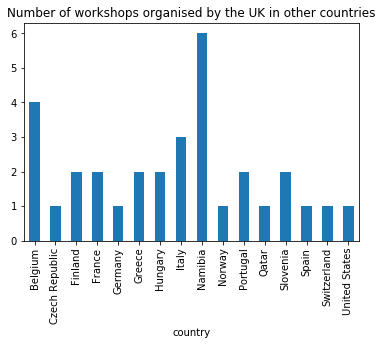

In [14]:
# How many workshops organised by UK institutions but outside of UK?
print("Total workshops organised by the UK in other countries: " + 
      str(workshops_df[workshops_df['country_code'] != "GB"]['country_code'].count()))
workshops_outside_UK = workshops_df[workshops_df['country_code'] != "GB"]
print(workshops_outside_UK[['slug', 'country']])

workshops_outside_UK_per_country = workshops_outside_UK.groupby(['country'])['country'].count()
workshops_outside_UK_per_country.plot(kind='bar', stacked=True, title="Number of workshops organised by the UK in other countries")
print(workshops_outside_UK_per_country)

In [15]:
# Add UK region for a workshop based on its geocoordinates as a new column
idx = workshops_df.columns.get_loc("country")
workshops_df.insert(loc=idx + 1, column='region',
                            value=workshops_df["country_code"])
workshops_df['region'] = workshops_df.apply(lambda x: helper.get_uk_region(latitude=x['latitude'],
                                    longitude=x['longitude']), axis=1)
print("\n################################\nThis took a while but it has finished now")

Looking up region for geocoordinates: (51.49191, -3.1854299999999998)
Looking up region for geocoordinates: (51.5302, -0.1271)
Looking up region for geocoordinates: (51.4816, 0.2799)
Looking up region for geocoordinates: (54.01212099999999, 2.789279)
Could no find UK region for location (54.01212099999999, 2.789279)
Looking up region for geocoordinates: (nan, nan)
Could no find UK region for location (nan, nan)
Looking up region for geocoordinates: (51.5280395, -0.1015937)
Looking up region for geocoordinates: (52.074389000000004, -0.629225)
Looking up region for geocoordinates: (51.6576076, -1.2287899)
Looking up region for geocoordinates: (50.824343, 4.394176)
Could no find UK region for location (50.824343, 4.394176)
Looking up region for geocoordinates: (48.840447, 2.310683)
Could no find UK region for location (48.840447, 2.310683)
Looking up region for geocoordinates: (nan, nan)
Could no find UK region for location (nan, nan)
Looking up region for geocoordinates: (nan, nan)
Could

KeyboardInterrupt: 

In [ ]:
# Add UK region for a workshop based on its organiser (lookup UK academic institutitons and HESA data) as a new column
uk_academic_institutions = pd.read_csv("lib/UK-academic-institutions.csv", encoding = "utf-8")
hesa_UK_higher_education_providers = pd.read_csv("lib/HESA_UK_higher_education_providers.csv", encoding = "utf-8")
hesa_UK_higher_education_providers_region_mapping = dict(hesa_UK_higher_education_providers[['UKPRN', 'Region']].values) # create a dict for lookup

uk_academic_institutions['domain'] = uk_academic_institutions['WEBSITE_URL'].apply(lambda x: x.strip("http://www.").strip("/")) # strip 'http://www' from domain
uk_academic_institutions['region'] = uk_academic_institutions['UKPRN'].map(hesa_UK_higher_education_providers_region_mapping, na_action="ignore")
print(uk_academic_institutions)

uk_academic_institutions_region_mapping = dict(uk_academic_institutions[['domain', 'region']].values) # create a dict for lookup

idx = workshops_df.columns.get_loc("organiser_country_code")
workshops_df.insert(loc=idx + 1, column='organiser_region', value=workshops_df["organiser_domain"])
workshops_df['organiser_region'] = workshops_df['organiser_region'].map(uk_academic_institutions_region_mapping,na_action="ignore")
workshops_df.head(5)

In [ ]:
print(workshops_df.columns)
workshops_df[workshops_df['region'].isnull()]

In [ ]:
# Let's get normalised and common names for UK academic instituions, if exist, by mapping to UK higher education providers
uk_academic_institutions_normalised_names_mapping = dict(uk_academic_institutions[['domain', 'PROVIDER_NAME']].values) # create a dict for lookup
uk_academic_institutions_common_mapping = dict(uk_academic_institutions[['domain', 'VIEW_NAME']].values) # create a dict for lookup

# Insert normalised (official) name for organiser 
workshops_df.insert(loc=idx + 2, column='organiser_normalised_name', value=workshops_df["organiser_domain"])
workshops_df['organiser_normalised_name'] = workshops_df['organiser_normalised_name'].map(uk_academic_institutions_normalised_names_mapping,na_action="ignore")

# Insert common name for organiser
workshops_df.insert(loc=idx + 3, column='organiser_common_name', value=workshops_df["organiser_domain"])
workshops_df['organiser_common_name'] = workshops_df['organiser_common_name'].map(uk_academic_institutions_normalised_names_mapping,na_action="ignore")


In [ ]:
print(workshops_df.columns)
workshops_df[workshops_df['organiser_common_name'].isnull()]

In [ ]:
# Extract workshop year from its slug and add as a new column
# workshops_df.drop(['year'], axis=1)
idx = workshops_df.columns.get_loc("start")
workshops_df.insert(loc=idx, column='year', value=workshops_df["start"])
workshops_df["year"] = workshops_df["start"].map(lambda date: datetime.datetime.strptime(date, "%Y-%m-%d").year,
                                                 na_action="ignore")
workshops_df[workshops_df['year'].isnull()]

In [ ]:
# Save all the processed workshop data into a separate CSV file, in the case we need to look into it later
processed_data_file = PROCESSED_DATA_DIR + "/processed_" + os.path.basename(workshops_file)
workshops_df.to_csv(processed_data_file, encoding = "utf-8")
print("Saved processed Carpentry workshop data to "+ processed_data_file)

In [ ]:
# Now get rid of all "stalled", "cancelled" and "unresponsive" workshops for further analyses
workshops_df = workshops_df[(~workshops_df['workshop_status'].isin(STOPPED_WORKSHOP_TYPES))]
workshops_df

In [ ]:
# How many workshops are there for each year?
workshops_per_year = workshops_df['year'].value_counts()
workshops_per_year.sort_index(ascending = True, inplace=True)
workshops_per_year.index.name = 'year'
print(workshops_per_year.index.dtype)
workshops_per_year.index = workshops_per_year.index.astype(int)
print(workshops_per_year.index.dtype)
print(workshops_per_year.index)
workshops_per_year = workshops_per_year.to_frame('number_of_workshops')
print(workshops_per_year)
workshops_per_year.plot(kind='bar', legend=True, title ="Workshops per year")

In [ ]:
# How many SWC, DC, LC, TTT workshops were held so far?
workshops_per_type = workshops_df['workshop_type'].value_counts()
workshops_per_type.index.name = 'workshop_type'
workshops_per_type = workshops_per_type.to_frame('number_of_workshops')
print(workshops_per_type)
workshops_per_type.plot(kind='bar', legend=True, title ="Number of workshops for different workshop types")

In [ ]:
# How are numbers of different workshops (SWC, DC, LC, TTT) changing over years?
workshops_per_type_per_year = workshops_df.groupby(['workshop_type', 'year'])['workshop_type'].count().unstack('workshop_type').fillna(0).astype(dtype='int')
workshops_per_type_per_year.plot(kind='bar', stacked=True, title="Number of workshops over years for different workshop types")
print(workshops_per_type_per_year)

In [ ]:
print(workshops_per_type_per_year.columns)

In [ ]:
# How many workshops were held at each host institution?
workshops_per_host = workshops_df['organiser_domain'].value_counts()
print(workshops_per_host)
workshops_per_host.plot(kind='barh', legend=True, title ="Workshops per organising institution", figsize = (15,15))

In [ ]:
# How many workshops were held at each region?
print("Workshops with no region: ")
workshops_df[workshops_df['region']==""]

workshops_per_region = workshops_df['region'].value_counts().sort_values()
print(workshops_per_region)
total_no_workshops = workshops_per_region.sum()
print("Total number of workshops: " +str(total_no_workshops))
workshops_per_region.plot(kind='bar', legend=True, title ="Workshops per region", figsize = (10,10))

In [ ]:
# How are numbers of different workshop types (SWC, DC, LC, TTT) looking per regions?
workshops_per_type_per_region = workshops_df.groupby(['workshop_type', 'region'])['workshop_type'].count().unstack('workshop_type').fillna(0).astype(dtype='int')
print(workshops_per_type_per_region.sum(axis = 1, skipna = True))
workshops_per_type_per_region['total'] = workshops_per_type_per_region.sum(axis = 1, skipna = True)
workshops_per_type_per_region = workshops_per_type_per_region.sort_values(axis = 0, by=['total'])
workshops_per_type_per_region[WORKSHOP_TYPES].plot(kind='bar', stacked=True, title="Number of workshops per region for different workshop types", figsize = (12,7))
print(workshops_per_type_per_region)

In [ ]:
# Add R&D expenditure per region and let's plot that longside workshops per region to see how they match
R_and_D_expenditure = pd.read_csv(CURRENT_DIR +"/lib/R_and_D_expenditure-for-HE.csv", encoding = "utf-8")
R_and_D_expenditure_mapping = dict(R_and_D_expenditure[['Region','% of total R&D expenditure']].values)
workshops_per_region_df = pd.DataFrame()
workshops_per_region_df['region'] = workshops_per_region.index
workshops_per_region_df['workshop_count'] = workshops_per_region.index
workshops_per_region_df['workshop_count'] = workshops_per_region_df['workshop_count'].map(workshops_per_region)
workshops_per_region_df['R_and_D_expenditure_%'] = workshops_per_region_df['region'].map(R_and_D_expenditure_mapping)
total_no_workshops = workshops_per_region.sum()
workshops_per_region_df['workshop_count_%'] = (workshops_per_region_df['workshop_count']/total_no_workshops)*100
workshops_per_region_df.index = workshops_per_region_df['region']
print("Total number of workshops: " +str(total_no_workshops))
print(workshops_per_region_df)
workshops_per_region_df[['workshop_count_%', 'R_and_D_expenditure_%']].plot(kind='bar', legend=True, title ="Workshops per region vs R&D HE expenditure", figsize = (12,7))

In [ ]:
# How about workshop domains?
workshop_domains_file = DATA_DIR + "/raw/redash_workshops_UK_domains_2020_02_21.csv"
workshop_domains = pd.read_csv(workshop_domains_file, encoding = "utf-8")
workshop_domains["domains_list"] = workshop_domains["workshop_request_domains"].str.split(':')
# workshop_domains
print("\nAll workshops we have domains for:\n")
print(workshop_domains["domains_list"])

# Get rid of all 'stopped' workshops
# First - convert column "tags" from a string to a list of strings
idx = workshop_domains.columns.get_loc("workshop_tags")
workshop_domains.insert(loc=idx, column='tags_list', value=workshop_domains["workshop_tags"])
workshop_domains["tags_list"] = workshop_domains["workshop_tags"].str.split(',')
# Now extract the workshop status, normally ('cancelled', 'unresponsive', 'stalled'), from tags_list
idx = workshop_domains.columns.get_loc("tags_list")
workshop_domains.insert(loc=idx, column='workshop_status',
                            value=workshop_domains["tags_list"])
workshop_domains["workshop_status"] = workshop_domains["tags_list"].map(helper.extract_workshop_status, na_action="ignore")
print(workshop_domains[["workshop_slug", "workshop_status"]])
# Finally, get rid of all "stalled", "cancelled" and "unresponsive" workshops for further analyses
print("Number of workshops that did not go ahead: " + 
      str(workshop_domains[(workshop_domains['workshop_status'].isin(STOPPED_WORKSHOP_TYPES))]['workshop_status'].count()))
workshop_domains = workshop_domains[(~workshop_domains['workshop_status'].isin(STOPPED_WORKSHOP_TYPES))]
print("\nWorkshops after removing the ones that did not go ahead:\n")
print(workshop_domains[["workshop_slug", "workshop_status"]])

print("\nAll domains:\n")
domains = pd.read_csv(CURRENT_DIR + "/lib/all_domains.csv", encoding = "utf-8")
print(domains)
# count = workshop_domains["domains_list"].apply(lambda x: value in x).sum()
domains["count"] = domains["name"].apply(lambda domain: workshop_domains["domains_list"].apply(lambda x: domain in x).sum())
domains.index = domains["name"]
domains = domains.sort_values(by=['count'])

total_workshops = workshop_domains['workshop_status'].count()
print("\nOccurances of domains for " + str(total_workshops) + " workshops:\n")
print(domains)

domains.plot(kind='barh', title="Workshop domains (" + str(total_workshops) + " workshops)")


In [ ]:
# How many learners attended workshops over years?
attendance_per_year = workshops_df.groupby(['year'])["attendance"].sum().fillna(0).astype("int")
print(attendance_per_year)
attendance_per_year.plot(kind='bar', legend=True, title ="Number of learners for all workshop types over years")

In [ ]:
# How many learners attended workshops over years (with adjustments for missing attendance data with average attendance)?

# Disregard TTT workshops as they have attendance capped at 20 most of the times
average_attendance = round(workshops_df[workshops_df["workshop_type"] != "TTT"]["attendance"].mean())
print("Average workshop attendance: " + str(average_attendance) + "\n")
# Adjusted attendance over year data and graph
workshops_df["attendance"].fillna(average_attendance, inplace=True)
attendance_per_year = workshops_df.groupby(['year'])["attendance"].sum().astype("int")
print(attendance_per_year)
attendance_per_year.plot(kind='bar', legend=True, title ="Adjusted number of learners for all workshop types over years")

In [ ]:
# Total attendance for different workshop types (with missing data adjusted with average attendance)
attendance_per_type = workshops_df.groupby(['workshop_type'])['attendance'].sum().astype("int")
print(attendance_per_type)
attendance_per_type.plot(kind="bar", title="Total attendance per workshop type")

In [ ]:
# How many learners attended each of (SWC, DC, LC, TTT) workshops over years (missing data adjusted by average attendance)?
attendance_per_type_per_year = workshops_df.groupby(['workshop_type', 'year'])['attendance'].sum().unstack("workshop_type").fillna(0).astype("int")
print(attendance_per_type_per_year)
attendance_per_type_per_year.plot(kind='bar', stacked=True, title="Attendance at different workshop types over years")


In [ ]:
# Attendance just for SWC workshops over years
# Can be done similarly for DC, LC, TTT workshops, this is just an example
attendance_per_type_per_year["SWC"].plot(kind='bar', title="Attendance at SWC workshops")

In [ ]:
# How are workshops spread over UK regions? - plot workshops over UK regions
workshops_per_UK_region = workshops_df['region'].value_counts()
workshops_per_UK_region.index.name = 'region'
workshops_per_UK_region = workshops_per_UK_region.to_frame('number_of_workshops')
print(workshops_per_UK_region)
workshops_per_UK_region.plot(kind='bar', legend=True, title ="Workshops per UK region")

In [ ]:
# Save all analyses into an Excel spreadsheet
ANALYSES_DIR = "data/analyses/"
if not os.path.exists(ANALYSES_DIR):
    os.makedirs(ANALYSES_DIR)

workshops_file_name = os.path.basename(workshops_file)
workshops_file_name_without_extension = re.sub('\.csv$', '', workshops_file_name.strip())
workshop_analyses_excel_file = ANALYSES_DIR + "analysed_" + workshops_file_name_without_extension + '_from_ipynb.xlsx'

excel_writer = pd.ExcelWriter(workshop_analyses_excel_file, engine='xlsxwriter')

workshops_df.to_excel(excel_writer, sheet_name=os.path.splitext(workshops_file_name)[0][:31], index=False)

# Write all tables we used for lookup
uk_academic_institutions.to_excel(excel_writer, sheet_name='uk_academic_institutions', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['uk_academic_institutions']
R_and_D_expenditure.to_excel(excel_writer, sheet_name='R_and_D_expenditure', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['R_and_D_expenditure']

# Workshops per year
workshops_per_year.to_excel(excel_writer, sheet_name='workshops_per_year', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_per_year']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['workshops_per_year', 1, 0, len(workshops_per_year.index), 0],
        'values': ['workshops_per_year', 1, 1, len(workshops_per_year.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Year'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops per year'})
worksheet.insert_chart('I2', chart)

# Workshops per type   
workshops_per_type.to_excel(excel_writer, sheet_name='workshops_per_type', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_per_type']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['workshops_per_type', 1, 0, len(workshops_per_type.index), 0],
        'values': ['workshops_per_type', 1, 1, len(workshops_per_type.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Workshop type'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops of different types'})
worksheet.insert_chart('I2', chart)
    
# Workshops per type per year
workshops_per_type_per_year.to_excel(excel_writer, sheet_name='workshops_per_type_per_year', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_per_type_per_year']
chart = workbook.add_chart({'type': 'column', 'subtype': 'stacked'})
for i in range(1, len(workshops_per_type_per_year.columns) + 1):
    chart.add_series({
            'name': ['workshops_per_type_per_year', 0, i],
            'categories': ['workshops_per_type_per_year', i, 0, len(workshops_per_type_per_year.index), 0],
            'values': ['workshops_per_type_per_year', 1, i, len(workshops_per_type_per_year.index), i],
            'gap': 2,
        })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_x_axis({'name': 'Year'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops of different types over years'})
worksheet.insert_chart('B20', chart)

# Workshops per host
workshops_per_host.to_excel(excel_writer, sheet_name='workshops_per_host', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_per_host']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['workshops_per_host', 1, 0, len(workshops_per_host.index), 0],
        'values': ['workshops_per_host', 1, 1, len(workshops_per_host.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Host institution'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops per host'})
worksheet.insert_chart('I2', chart)

# Workshops per region
workshops_per_region.to_excel(excel_writer, sheet_name='workshops_per_region', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_per_region']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['workshops_per_region', 1, 0, len(workshops_per_region.index), 0],
        'values': ['workshops_per_region', 1, 1, len(workshops_per_region.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Host institution'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops per region'})
worksheet.insert_chart('I2', chart)

# Workshops per type per region
workshops_per_type_per_region.to_excel(excel_writer, sheet_name='workshops_per_type_per_region', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_per_type_per_region']
chart = workbook.add_chart({'type': 'column', 'subtype': 'stacked'})
for i in range(1, len(workshops_per_type_per_region[WORKSHOP_TYPES].columns) + 1):
    chart.add_series({
            'name': ['workshops_per_type_per_region', 0, i],
            'categories': ['workshops_per_type_per_region', i, 0, len(workshops_per_type_per_region[WORKSHOP_TYPES].index), 0],
            'values': ['workshops_per_type_per_region', 1, i, len(workshops_per_type_per_region[WORKSHOP_TYPES].index), i],
            'gap': 2,
        })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_x_axis({'name': 'Region'})
chart.set_y_axis({'name': 'Number of workshops', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops of different type per region'})
worksheet.insert_chart('B20', chart)

# Workshop domains
domains['count'].to_excel(excel_writer, sheet_name='workshops_domains', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['workshops_domains']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['workshops_domains', 1, 0, len(domains.index), 0],
        'values': ['workshops_domains', 1, 1, len(domains.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Host institution'})
chart.set_y_axis({'name': 'Number of domains', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of workshops per domain'})
worksheet.insert_chart('I2', chart)

# Workshop attendance per year
attendance_per_year.to_excel(excel_writer, sheet_name='attendance_per_year', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['attendance_per_year']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['attendance_per_year', 1, 0, len(attendance_per_year.index), 0],
        'values': ['attendance_per_year', 1, 1, len(attendance_per_year.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Year'})
chart.set_y_axis({'name': 'Number of attendees', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of attendees per year (with estimates for missing data)'})
worksheet.insert_chart('I2', chart)

# Workshop attendance per workshop type
attendance_per_type.to_excel(excel_writer, sheet_name='attendance_per_type', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['attendance_per_type']
chart = workbook.add_chart({'type': 'column'})
chart.add_series({
        'categories': ['attendance_per_type', 1, 0, len(attendance_per_type.index), 0],
        'values': ['attendance_per_type', 1, 1, len(attendance_per_type.index), 1],
        'gap': 2,
    })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_legend({'position': 'none'})
chart.set_x_axis({'name': 'Workshop type'})
chart.set_y_axis({'name': 'Number of attendees', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Number of attendees per workshop type (with estimates for missing data)'})
worksheet.insert_chart('I2', chart)

# Workshop attendance per workshop type per year
attendance_per_type_per_year.to_excel(excel_writer, sheet_name='attendance_per_type_per_year', index=True)
workbook = excel_writer.book
worksheet = excel_writer.sheets['attendance_per_type_per_year']
chart = workbook.add_chart({'type': 'column', 'subtype': 'stacked'})
for i in range(1, len(attendance_per_type_per_year.columns) + 1):
    chart.add_series({
            'name': ['attendance_per_type_per_year', 0, i],
            'categories': ['attendance_per_type_per_year', i, 0, len(attendance_per_type_per_year.index), 0],
            'values': ['attendance_per_type_per_year', 1, i, len(attendance_per_type_per_year.index), i],
            'gap': 2,
        })
chart.set_y_axis({'major_gridlines': {'visible': False}})
chart.set_x_axis({'name': 'Year'})
chart.set_y_axis({'name': 'Attendance', 'major_gridlines': {'visible': False}})
chart.set_title({'name': 'Attendance at workshops of different types over years (with estimates for missing data)'})
worksheet.insert_chart('B20', chart)

excel_writer.save()
print("Saved workshop analyses in " + workshop_analyses_excel_file)